In [1]:
import numpy as np
import sympy as sym
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.pyplot as plt

#Punto 1
$\frac{du}{dt} = u^{q},$ $t \in [0,10]$ \\
para $q>1$: \\
$\frac{du}{u^{q}} = dt $ \\
$\frac{u^{-q+1}}{-q+1} = t $ \\
*$u(t) = [(1-q)t+C]^{\frac{1}{1-q}} $ \\
para $q = 0$: \\
*$u(t) = e^t$ \\
tenemos que $u(0) = 1$

In [2]:
def System(t,q, r0):
    lista = []
    for i in range(len(q)):      
      def getSol(t, u):
          return u**q[i]
      solver = solve_ivp(getSol, [t[0], t[-1]], r0, method = 'RK45', t_eval = t)
      lista.append(solver.y)
      
    return lista

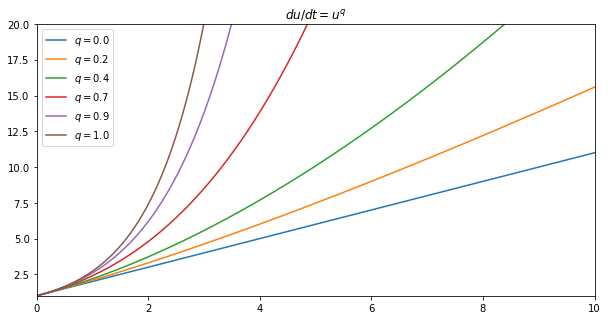

In [3]:
#Discretización temporal
t = np.linspace(0, 10, 1000)
#Valores de q
q = [0., 0.2, 0.4, 0.7, 0.9, 1.]
#Condición inicial

Sol = System(t, q, r0=[1])

plt.figure(figsize=(10,5))
for i, val in enumerate(q):
    plt.plot(t,Sol[i].flatten(), label = f'$q = {val}$')
plt.title("$du/dt = u^q$")
plt.xlim(0,10)
plt.ylim(1,20)
plt.legend(loc = 0)
plt.show()

#Punto 2 
Coeficientes métodos Multipasos \\
Se definen los valores para los pasados, el presente y los futuros así, respectivamente: \\
$[-3h, -2h, -h, 0, h, 2h, 3h]$ \\
$[t_{n-3}, t_{n-2}, t_{n-1}, t_{n},t_{n+1},t_{n+2}, t_{n+3}]$ \\
Además se tiene que: \\
$t_n - t_{n-k} = kh$






In [4]:
t = sym.Symbol('t',Real=True)
h = sym.Symbol('h',Real=True)

Adams Bashfort 3 puntos \\
$L_0 = (\frac{t-t_{n-1}}{t_{n}-t_{n-1}})(\frac{t-t_{n-2}}{t_{n}-t_{n-2}})$ \\
$L_1 = (\frac{t-t_{n}}{t_{n-1}-t_{n}})(\frac{t-t_{n-2}}{t_{n-1}-t_{n-2}})$ \\
$L_2 = (\frac{t-t_{n}}{t_{n-2}-t_{n}})(\frac{t-t_{n-1}}{t_{n-2}-t_{n-1}})$ \\

In [5]:
F0 = (t-(-h))*(t-(-2*h))/((h)*(2*h))
F1 = (t-(0))*(t-(-2*h))/((-h)*(h))
F2 = (t-(0))*(t-(-h))/((-2*h)*(-h))
I0 = sym.integrate(F0, (t,0,h))
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
W = [I0, I1, I2]
print("Los pesos para Adams Bashfort de 3 puntos son:", str(W))

Los pesos para Adams Bashfort de 3 puntos son: [23*h/12, -4*h/3, 5*h/12]


Adams Bashfort 4 puntos \\
$L_0 = (\frac{t-t_{n-1}}{t_{n}-t_{n-1}})(\frac{t-t_{n-2}}{t_{n}-t_{n-2}})(\frac{t-t_{n-3}}{t_n - t_{n-3}})$ \\
$L_1 = (\frac{t-t_{n}}{t_{n-1}-t_{n}})(\frac{t-t_{n-2}}{t_{n-1}-t_{n-2}})(\frac{t-t_{n-3}}{t_{n-1} - t_{n-3}})$ \\
$L_2 = (\frac{t-t_{n}}{t_{n-2}-t_{n}})(\frac{t-t_{n-1}}{t_{n-2}-t_{n-1}})(\frac{t-t_{n-3}}{t_{n-2} - t_{n-3}})$ \\
$L_3 = (\frac{t-t_{n}}{t_{n-3}-t_{n}})(\frac{t-t_{n-1}}{t_{n-3}-t_{n-1}})(\frac{t-t_{n-2}}{t_{n-3} - t_{n-2}})$ \\

In [6]:
F0 = (t-(-h))*(t-(-2*h))*(t-(-3*h))/((h)*(2*h)*(3*h))
F1 = (t-(0))*(t-(-2*h))*(t-(-3*h))/((-h)*(h)*(2*h))
F2 = (t-(0))*(t-(-h))*(t-(-3*h))/((-2*h)*(-h)*(h))
F3 = (t-(0))*(t-(-h))*(t-(-2*h))/((-3*h)*(-2*h)*(-h))
I0 = sym.integrate(F0, (t,0,h))
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
W = [I0, I1, I2, I3]
print("Los pesos para Adams Bashfort de 4 puntos son:", str(W))

Los pesos para Adams Bashfort de 4 puntos son: [55*h/24, -59*h/24, 37*h/24, -3*h/8]


Adams Moulton 3 puntos \\
$L_0 = (\frac{t-t_{n}}{t_{n+1}-t_{n}})(\frac{t-t_{n-1}}{t_{n+1}-t_{n-1}})$ \\
$L_1 = (\frac{t-t_{n+1}}{t_{n}-t_{n+1}})(\frac{t-t_{n-1}}{t_{n}-t_{n-1}})$  \\
$L_2 = (\frac{t-t_{n+1}}{t_{n-1}-t_{n+1}})(\frac{t-t_{n}}{t_{n-1}-t_{n}})$   \\

In [7]:
F0 = (t-(0))*(t-(-h))/((h)*(2*h))
F1 = (t-(h))*(t-(-h))/((-h)*(h))
F2 = (t-(h))*(t-(0))/((-2*h)*(-h))
I0 = sym.integrate(F0, (t,0,h))
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
W = [I0, I1, I2]
print("Los pesos para Adams Moulton de 3 puntos son:", str(W))

Los pesos para Adams Moulton de 3 puntos son: [5*h/12, 2*h/3, -h/12]


Adams Moulton 4 puntos \\
$L_0 = (\frac{t-t_{n}}{t_{n+1}-t_{n}})(\frac{t-t_{n-1}}{t_{n+1}-t_{n-1}})(\frac{t-t_{n-2}}{t_{n+1}-t_{n-2}})$ \\
$L_1 = (\frac{t-t_{n+1}}{t_{n}-t_{n+1}})(\frac{t-t_{n-1}}{t_{n}-t_{n-1}})(\frac{t-t_{n-2}}{t_{n}-t_{n-2}})$  \\
$L_2 = (\frac{t-t_{n+1}}{t_{n-1}-t_{n+1}})(\frac{t-t_{n}}{t_{n-1}-t_{n}})(\frac{t-t_{n-2}}{t_{n-1}-t_{n-2}})$   \\
$L_3 = (\frac{t-t_{n+1}}{t_{n-2}-t_{n+1}})(\frac{t-t_{n}}{t_{n-2}-t_{n}})(\frac{t-t_{n-1}}{t_{n-2}-t_{n-1}})$

In [8]:
F0 = (t-(0))*(t-(-h))*(t-(-2*h))/((h)*(2*h)*(3*h))
F1 = (t-(h))*(t-(-h))*(t-(-2*h))/((-h)*(h)*(2*h))
F2 = (t-(h))*(t-(0))*(t-(-2*h))/((-2*h)*(-h)*(h))
F3 = (t-(h))*(t-(0))*(t-(-h))/((-3*h)*(-2*h)*(-h))
I0 = sym.integrate(F0, (t,0,h))
I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
W = [I0, I1, I2, I3]
print("Los pesos para Adams Moulton de 4 puntos son:", str(W))

Los pesos para Adams Moulton de 4 puntos son: [3*h/8, 19*h/24, -5*h/24, h/24]


#Punto 4

LeapFrog \\

Para este punto se hará con la forma matricial \\

$t \in (0,10) $ \\
$J = \begin{pmatrix}
0 & 1 \\
-1 & 0 
\end{pmatrix}$

In [9]:
#Discretización temporal
N= 1001
t = np.linspace(0,10,N)
gl = 2 #Grados de libertad

#Parámetros
m,k = 1,1

In [10]:
def GetLeapFrog(r0, t):
    J = np.array([[0,1], [-1,0]]) #Matriz simpléctica
    def F(U):
        F = np.dot(J, U)
        return F
    h = (t[-1] - t[0])/(N-1)
    U = np.zeros((len(t), gl ))
    U[0] = r0
    
    for i in range(1,len(t)):
        if i == 1:
            U[i] = U[i-1] + h*F(U[i-1])
        else:
            U[i] = U[i-2] + 2*h*F(U[i-1])
    E = np.zeros((len(t), gl))
    x = U[:,0]
    v = U[:,1]

    return x, v

In [11]:
def GetA(x):
    #return -(np.pi)**2*x
    #Pendulo
    return -x
def GetLeapFrog1(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*GetA(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*GetA(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    #print(len(X),len(V))
    
    return X,V

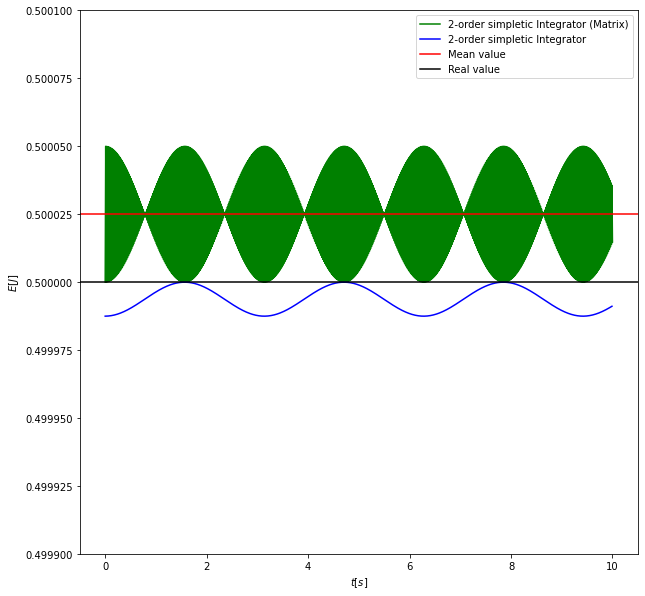

In [12]:
r0 = np.array([1,0])
x, v = GetLeapFrog(r0, t)
x1, v1 = GetLeapFrog1(r0, t)
Ek = 0.5*v1**2
Ep = 0.5*x1**2
Ke = 0.5*v**2
U = 0.5*x**2
fig = plt.figure(figsize=(10,10))
meanE = np.average(Ke+U)
plt.plot(t, Ke+U , c = 'g', label = "2-order simpletic Integrator (Matrix)")
plt.plot(t[0:-1], Ek + Ep , c = 'b', label = "2-order simpletic Integrator")
plt.xlabel("$t[s]$")
plt.ylabel("$E[J]$")
plt.axhline(meanE, c ='r', label="Mean value")
plt.axhline(0.5, c ='k', label="Real value")
plt.ylim(0.4999,0.5001)
plt.legend(loc=0)